# Fetching data

**Table of contents**<a id='toc0_'></a>    
- 1. [Fetching data using an API](#toc1_)    
  - 1.1. [Import data from Denmark Statistics](#toc1_1_)    
  - 1.2. [FRED (Federal Reserve Economic Data)](#toc1_2_)    
  - 1.3. [World Bank indicators: `wb`](#toc1_3_)    
- 2. [A few examples of open access APIs](#toc2_)    
- 3. [Other sources](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

You may need to install the DST api-data reader and the pandas_datareader. Uncomment the following cells and run to install.  
The %pip is a jupyter magic function, it is similar to writing pip install directly in your terminal/comand prompt. (see [Link](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/)).  
You could also use a ! in front of each command, which indicates that this is a system command that may as well have been executed in the terminal/command prompt of your computer. 

In [1]:
# The DST API wrapper
#%pip install git+https://github.com/alemartinello/dstapi

In [2]:
# A wrapper for multiple APIs with a pandas interface
#%pip install pandas-datareader

In [3]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

## 1. <a id='toc1_'></a>[Fetching data using an API](#toc0_)

API stands for **Application Programming Interface**. An API is an interface through which we can directly ask for and **receive data from an online source**. We will be using packages for this and will not look that much at what is going on underneath. 

1. We use `pandas_datareader` to access many common **international online data** sources (install with `pip install pandas-datareader`)
2. For **Statistics Denmark**, Alessandro Martinello has written the `dstapi` package (install with `pip install git+https://github.com/alemartinello/dstapi`)

Fetching data from an API requires an **internet connection** and works directly without saving data to your harddisk (unless you ask Python to do so afterwards). You can use it to automate tasks such as fetching the most recent data, doing some calculations and outputting it in the same manner. This can be useful e.g. for quarterly reports. Remember to save the data on your computer if you really need it for later though. The admins of the data may turn off the water..

**Pros:** Automatic; smart; everything is done from Python (so no need to remember steps in between). 

**Cons:** The connection can be slow or drop out, which may lead to errors. If e.g. 100 students simultaneously fetch data (during, say, a lecture), the host server may not be able to service all the requests and may drop out. 

> The raw output data from an API could look like this: https://stats.oecd.org/SDMX-JSON/data/NAAG. It is a log list of non-human-readable gobledygook in the so-called "JSON" format. 

### 1.1. <a id='toc1_1_'></a>[Import data from Denmark Statistics](#toc0_)

#### Import using dstapi
We'll use [dstapi](https://github.com/alemartinello/dstapi) by Alessandro Martinello. There is an additional guide on the github page.

Before fecthing data it's probably necessary to have a look at [DST](https://www.statistikbanken.dk/statbank5a/default.asp?w=1920) to find the names of the datasets that you want.

I apologize in advance, the dst api has an english option, but not everything is translated.

**Setup:**  
Create an dst api **object** that will allow us to interact with the DST server. 

In [5]:
ind = DstApi('INDKP107') 

A quick overview of the available data

In [6]:
tabsum = ind.tablesummary(language='en')
display(tabsum)

Table INDKP107: Income, persons by region, unit, sex, level of education, type of income and time
Last update: 2022-11-24T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,OMRÅDE,115,000,All Denmark,851,Aalborg,False
1,ENHED,4,101,People with type of income (number),121,Average income for people with type of income ...,False
2,KOEN,3,MOK,"Men and women, total",K,Women,False
3,UDDNIV,7,10,10 BASIC SCHOOL 8-10 grade,9,Not stated,False
4,INDKOMSTTYPE,39,100,1 Disposable income (2+30-31-32-35),290,Taxable income,False
5,Tid,18,2004,2004,2021,2021,True


In [7]:
# The available values for a each variable: 
for variable in tabsum['variable name']:
    print(variable+':')
    display(ind.variable_levels(variable, language='en'))


OMRÅDE:


,id,text
0,000,All Denmark
1,084,Region Hovedstaden
2,01,Province Byen København
3,101,Copenhagen
4,147,Frederiksberg
...,...,...
110,773,Morsø
111,840,Rebild
112,787,Thisted
113,820,Vesthimmerlands


ENHED:


,id,text
0,101,People with type of income (number)
1,110,Amount of income (DKK 1.000)
2,116,Average income for all people (DKK)
3,121,Average income for people with type of income ...


KOEN:


,id,text
0,MOK,"Men and women, total"
1,M,Men
2,K,Women


UDDNIV:


,id,text
0,10,10 BASIC SCHOOL 8-10 grade
1,26,20+25 UPPER SECONDARY SCHOOL
2,35,35 VOCATIONAL EDUCATION
3,40,40 SHORT-CYCLE HIGHER EDUCATION
4,61,"50+60 MEDIUM-CYCLE HIGHER EDUCATION, BACHLEOR"
5,65,65 LONG-CYCLE HIGHER EDUCATION
6,9,Not stated


INDKOMSTTYPE:


,id,text
0,100,1 Disposable income (2+30-31-32-35)
1,105,"2 Pre-tax Income, total (3+7+22+26+29)"
2,110,3 Primary income (4+5+6)
3,115,"4 Wages and salaries etc., total"
4,120,"5 Entrepreneurial income, total"
5,125,6 Received fees subject to labour market contr...
6,130,7 Public transfer incomes(8+14+19)
7,135,8 Unemployment and cash benefits (9+10+11+12+13)
8,140,9 Unemployment benefits
9,145,10 Other benefits from unemployment funds


Tid:


,id,text
0,2004,2004
1,2005,2005
2,2006,2006
3,2007,2007
4,2008,2008
5,2009,2009
6,2010,2010
7,2011,2011
8,2012,2012
9,2013,2013


Define a param dictionary detailing the data we want

In [8]:
# The _define_base_params -method gives us a nice template (selects all available data)
params = ind._define_base_params(language='en')
params

{'table': 'indkp107',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'ENHED', 'values': ['*']},
  {'code': 'KOEN', 'values': ['*']},
  {'code': 'UDDNIV', 'values': ['*']},
  {'code': 'INDKOMSTTYPE', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

The `'*'`means select everything. <br>
We usually don't want all the available data

In [9]:
variables = params['variables'] # Returns a view, that we can edit
variables[1]['values'] = ['110', '116']
variables[2]['values'] =['M','K']
variables[3]['values'] = ['65']
variables[4]['values'] = ['100']
params

{'table': 'indkp107',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'ENHED', 'values': ['110', '116']},
  {'code': 'KOEN', 'values': ['M', 'K']},
  {'code': 'UDDNIV', 'values': ['65']},
  {'code': 'INDKOMSTTYPE', 'values': ['100']},
  {'code': 'Tid', 'values': ['*']}]}

In [10]:
# Or copy/paste/edit
params = {'table': 'indkp107',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'ENHED', 'values': ['110', '116']},
  {'code': 'KOEN', 'values': ['M','K']},
  {'code': 'UDDNIV', 'values': ['65']},
  {'code': 'INDKOMSTTYPE', 'values': ['100']},
  {'code': 'Tid', 'values': ['>2008<=2014']}]}

Now we load the data from dst via the api using the options specified in the param dictionary 

In [11]:
inc_api = ind.get_data(params=params)
inc_api.head(5)

,OMRÅDE,ENHED,KOEN,UDDNIV,INDKOMSTTYPE,TID,INDHOLD
0,Copenhagen,Amount of income (DKK 1.000),Men,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),2009,8608470
1,Copenhagen,Amount of income (DKK 1.000),Women,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),2009,6852657
2,Frederiksberg,Amount of income (DKK 1.000),Men,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),2009,2600753
3,Frederiksberg,Amount of income (DKK 1.000),Women,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),2009,1917541
4,All Denmark,Amount of income (DKK 1.000),Men,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),2009,54154088


In [12]:
inc_api.sort_values(by=['OMRÅDE', 'TID', 'KOEN'], inplace=True)
inc_api.head(5)

,OMRÅDE,ENHED,KOEN,UDDNIV,INDKOMSTTYPE,TID,INDHOLD
69,Aabenraa,Amount of income (DKK 1.000),Men,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),2009,272262
155,Aabenraa,Average income for all people (DKK),Men,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),2009,330816
70,Aabenraa,Amount of income (DKK 1.000),Women,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),2009,150008
156,Aabenraa,Average income for all people (DKK),Women,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),2009,274238
1433,Aabenraa,Amount of income (DKK 1.000),Men,65 LONG-CYCLE HIGHER EDUCATION,1 Disposable income (2+30-31-32-35),2010,321258


.. now you have a data set ready for cleaning and renaming.

### 1.2. <a id='toc1_2_'></a>[FRED (Federal Reserve Economic Data)](#toc0_)

We'll be using the [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/index.html) package.

**GDP data** for the US

In [11]:
# Need first to encode dates in a python friendly to specify the length of the desired time period. 
# Use the datetime module - it is the general way to handle dates in python. 
start = datetime.datetime(2005,1,1)
end = datetime.datetime(2017,1,1)
timespan = end - start # We can investigate the precise time span by just subtracting to time variables.
print('total number of days:', timespan.days) # The timespan object has a days attribute.

total number of days: 4383


In [14]:
# Call the FRED api using pandas_datareader 
gdp = pandas_datareader.data.DataReader('GDP', 'fred', start, end)
gdp.head(10)

,GDP
DATE,
2005-01-01,12767.286
2005-04-01,12922.656
2005-07-01,13142.642
2005-10-01,13324.204
2006-01-01,13599.160
2006-04-01,13753.424
2006-07-01,13870.188
2006-10-01,14039.560
2007-01-01,14215.651


**Finding data:**

1. go to https://fred.stlouisfed.org 
2. search for data in main bar, e.g. employment and unemployment
3. click the first links
4. table name is next to header 

We now want to pull down data on aggregate employment (PAYEMS) and unemployment (UNEMPLOY) levels and then plot the development. 

**Pulling the data:**

In [15]:
start = datetime.datetime(1939,1,1)
end = datetime.datetime(2021,12,1)

# We can pull from multiple sources in one go. Just combine them in a list.
empl_us = pandas_datareader.data.DataReader(['PAYEMS', 'UNEMPLOY'], 'fred', start, end)

**Plot:**

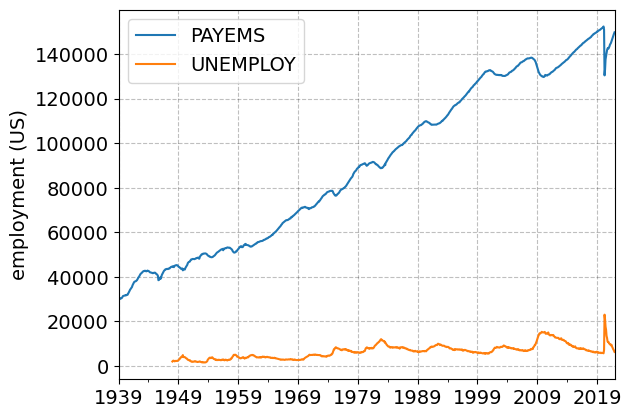

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Now we are just plotting directly from the pandas dataframe. Still using matplotlib under the hood.
empl_us.plot(ax=ax)

ax.legend(frameon=True)
ax.set_xlabel('')
ax.set_ylabel('employment (US)');

### 1.3. <a id='toc1_3_'></a>[World Bank indicators: `wb`](#toc0_)

[Documentation](https://pandas-datareader.readthedocs.io/en/latest/readers/world-bank.html)

**Finding data:**

1. go to https://data.worldbank.org/indicator/
2. search for GDP 
3. variable name ("NY.GDP.PCAP.KD") is in the URL

**Pull GDP numbers:**

In [17]:
# Need a different module than in the FRED case
from pandas_datareader import wb

In [18]:
wb_gdp = wb.download(indicator='NY.GDP.PCAP.KD', country=['SE','DK','NO'], start=1990, end=2017)

wb_gdp = wb_gdp.rename(columns = {'NY.GDP.PCAP.KD':'GDP'})
wb_gdp = wb_gdp.reset_index()
wb_gdp.sample(5)

,country,year,GDP
74,Sweden,1999,39309.597002
5,Denmark,2012,51567.040150
77,Sweden,1996,35139.402992
64,Sweden,2009,46043.480945
80,Sweden,1993,32474.429915


In [19]:
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  84 non-null     object 
 1   year     84 non-null     object 
 2   GDP      84 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.1+ KB


**Problems:** 
* It turns out that the dataframe has stored the variable *year* as an "object", meaning in practice that it is a string. This must be converted to an int, as we want to use it as a number. 
* *country* is in fact a text variable, so it is acceptable to have it as an object type. But pandas has implemented a string type on its own. It is called 'string', while the text type of object that you normally encounter is of type 'str'. Yes, confusing!!  But you want to get it right, because an object variable can also contain numbers in addition to text. Which is bad. 
* Fortunately, GDP is a float (i.e. a number). 

In [20]:
wb_gdp.year = wb_gdp.year.astype(int) # convert year
wb_gdp.country = wb_gdp.country.astype('string') # convert country to the special pandas string type
wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  84 non-null     string 
 1   year     84 non-null     int32  
 2   GDP      84 non-null     float64
dtypes: float64(1), int32(1), string(1)
memory usage: 1.8 KB


* About strings and the `object` type in pandas, see [here](https://towardsdatascience.com/why-we-need-to-use-pandas-new-string-dtype-instead-of-object-for-textual-data-6fd419842e24) and [here](https://pandas.pydata.org/docs/user_guide/text.html).

**Fetch employment-to-population ratio:**

In [22]:
wb_empl = wb.download(indicator='SL.EMP.TOTL.SP.ZS', country=['SE','DK','NO'], start=1990, end=2017) # don't need the special datetime here.
wb_empl.rename(columns = {'SL.EMP.TOTL.SP.ZS':'employment_to_pop'}, inplace=True) # Better col name
wb_empl.reset_index(inplace = True)
wb_empl.year = wb_empl.year.astype(int)
wb_empl.sample(3)

,country,year,employment_to_pop
37,Norway,2008,65.746002
30,Norway,2015,62.112000
44,Norway,2001,64.550003


**Merge:**

In [23]:
wb = pd.merge(wb_gdp, wb_empl, how = 'outer', on = ['country','year']);
wb.head(5)

,country,year,GDP,employment_to_pop
0,Denmark,2017,55735.764901,58.122002
1,Denmark,2016,54556.068955,57.957001
2,Denmark,2015,53254.856370,57.469002
3,Denmark,2014,52404.763971,57.014999
4,Denmark,2013,51831.797931,56.887001


In [24]:
wb.shape

(84, 4)

## 2. <a id='toc2_'></a>[A few examples of open access APIs](#toc0_)

As already demonstrated, you can pull data from DST using their API. Just to give a few examples of where else you may find open access to data by API: 
* Check out the [documentation for pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html). There is a bunch of economic data banks to access through that. 
* There is an API for [covid-19 data](https://pypi.org/project/covid19-data/) that draws on several sources. 
* The National Museum of Art (DK) gives access to their collection [by an API](https://www.smk.dk/article/smk-api/). 
* NASA has its own API. [Look here](https://api.nasa.gov/) for their documentation and [here](https://pypi.org/project/python-nasa-api/) for a Python wrapper. 
* The U.S. Bureau of Labor Statistics has an [API.](https://www.bls.gov/developers/api_python.htm#python2)
* [Google trends](https://trends.google.com/trends/?geo=US) tracks what google searches are popular and you can access this data using [pytrends](https://pypi.org/project/pytrends/), this [Notebook](https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Google_Trends_API.ipynb) can help get you started.

## 3. <a id='toc3_'></a>[Other sources](#toc0_)
* **A crazy large collection of APIs** found on [this Github repo](https://github.com/public-apis/public-apis). Stocks, government, map data, lol memes, anything..
* Datasets behind [FiveThirtyEight articles](https://github.com/fivethirtyeight/data)  ([this site](https://fivethirtyeight.com/))
* [IMDB](https://www.makeuseof.com/python-cinemagoer-imdb-data/) movie data 
* [ACLED](https://acleddata.com/data-export-tool/) has data on armed conflics, political violence and protests around the world. (They have an API but it seems non-trivial to work with that, so I would just recommend downloading the data directly from their website.)
* [Energinet](https://www.energidataservice.dk/datasets) has many public datasets on energy consumption and production. 
* [Danish Agency for Labour Market and Recruitment](https://www.jobindsats.dk/) has data on the Danish labour market and public benifits.